<a href="https://colab.research.google.com/github/dtabuena/Workshop/blob/main/LinLat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# n = 20
# k = 40
# j = 30
# l_dim = 10

# A_ = np.random.rand(k,n)
# B_ = np.random.rand(j,n)

# L_ = np.random.rand(l_dim,n)
# L_inv = np.linalg.pinv(L_)

# X_ = np.dot(A_,L_inv)
# Y_ = np.dot(B_,L_inv)




In [3]:

def als_round(A_,B_,X_,Y_,to_plot=False,verbose=False,first_it=False):
    '''
    A = L*X
    La=A*X'
    Xb = Lb' * A
    Ab = Lb * Xn

    B = L*Y
    Lb=B*Y'
    Ya = La' * B
    Ba = La * Yn
    '''

    def regularize(L):
        L=L-np.mean(L)
        L=L/np.amax(np.abs(L))
        return(L)

    if to_plot:
        if first_it:
            L_0 = np.zeros([X_.shape[0],Y_.shape[1]])
            fig,ax = plt.subplots(1,6,figsize=(12,2))
            ax[0].imshow(A_)
            ax[1].imshow(X_)
            ax[2].imshow(L_0)
            ax[3].imshow(L_0)
            ax[4].imshow(Y_)
            ax[5].imshow(B_)

            ax[0].set_title('A_')
            ax[1].set_title('X_init')
            ax[4].set_title('Y_init')
            ax[5].set_title('B_')
            plt.show()

    L_a = np.dot(A_,np.linalg.pinv(X_))
    L_a = regularize(L_a)
    Y_a = np.dot(np.linalg.pinv(L_a),B_)

    L_b = np.dot(B_,np.linalg.pinv(Y_a)) ## pinv(Y_)
    L_b = regularize(L_b)
    X_b = np.dot(np.linalg.pinv(L_b),A_)
    

    A_b = np.dot(L_b,X_b)
    B_a = np.dot(L_a,Y_a)

    A_er = np.linalg.norm(A_-A_b)
    B_er = np.linalg.norm(B_-B_a)
    L_er = np.linalg.norm(L_a-L_b)

    if verbose: print(A_er,B_er,L_er)

    if to_plot:
        fig,ax = plt.subplots(1,6,figsize=(12,2))
        ax[0].imshow(A_)
        ax[1].imshow(X_b)
        ax[2].imshow(L_a)
        ax[3].imshow(L_b)
        ax[4].imshow(Y_a)
        ax[5].imshow(B_)

        ax[0].set_title('A_')
        ax[1].set_title('X_b')
        ax[2].set_title('L_a')
        ax[3].set_title('L_b')
        ax[4].set_title('Y_a')
        ax[5].set_title('B_')
        plt.show()
    return X_b, Y_a, L_a, L_b



In [9]:



# for i_ in range(20):
#     X_, Y_ , L_a, L_b= als_round(A_,B_,X_,Y_,to_plot=to_plot,verbose = verbose)

[2 3 4 1 0]


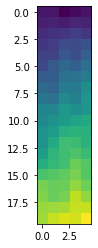

In [15]:
to_plot = False
verbose = False
n = 20
k = 14
j = 16
l_dim = 5

A_ = np.random.rand(n,k)
B_ = np.random.rand(n,j)

X_ = np.random.rand(l_dim,k)
Y_ = np.random.rand(l_dim,j)



L_source = np.random.rand(n,l_dim)
L_source=np.cumsum(L_source,0)
row_sum = np.sum(L_source,0)
L_source = L_source[:,np.argsort(row_sum)]
print(np.argsort(row_sum))
plt.imshow(L_source)

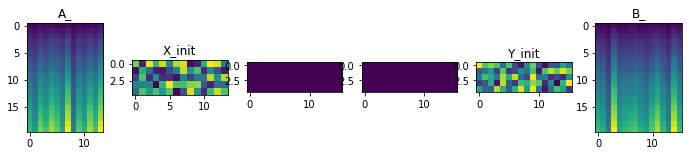

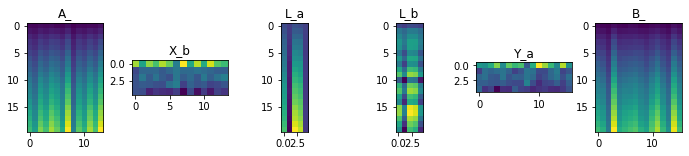

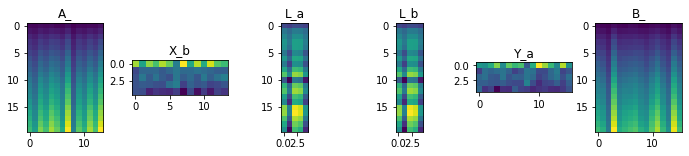

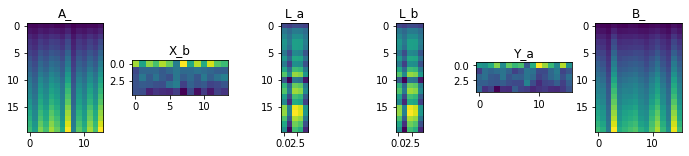

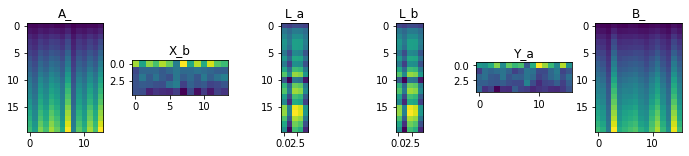

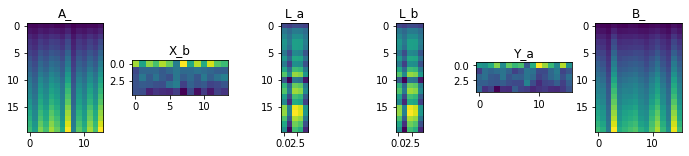

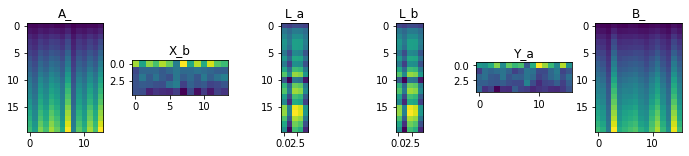

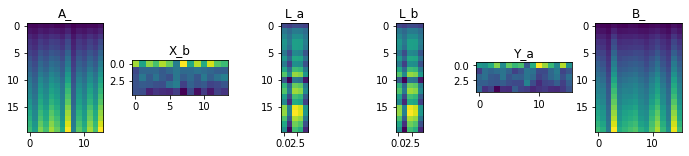

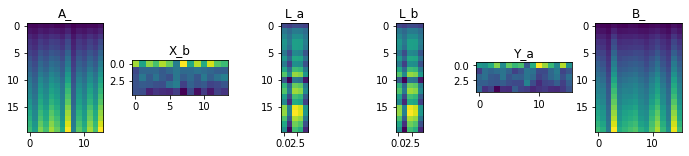

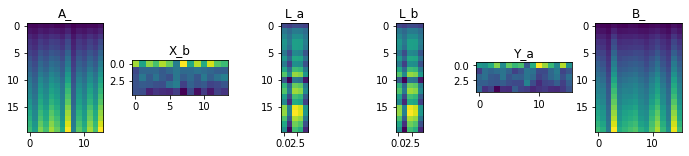

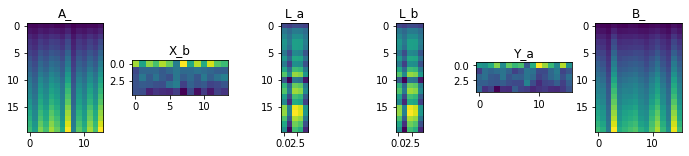

In [16]:

X_init = np.random.rand(l_dim,k)
Y_init = np.random.rand(l_dim,j)

A_calc = np.dot(L_source,X_init)
B_calc = np.dot(L_source,Y_init)

X_ = np.random.rand(l_dim,k)
Y_ = np.random.rand(l_dim,j)

to_plot = True
verbose = False
i_n = 10
for i_ in range(i_n):
    X_, Y_ , L_a, L_b= als_round(A_calc,B_calc,X_,Y_,to_plot=to_plot,verbose = verbose,first_it=i_==0)